<a href="https://colab.research.google.com/github/PosgradoMNA/ActividadesAprendizaje-A01794419-IgnacioQuintero/blob/main/Semana_7_Regresiones_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ciencia y Analítica de Datos
### Actividad Semanal 7

* Alumno: Ignacio Antonio Quintero Chávez.
* Matrícula: A01794419.
* Materia: Ciencia y analítica de datos.
* Profesora: María de la Paz Rico Fernández.
* Fecha: 9 Noviembre 2022.

# Notebook 1: Regresión

## Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

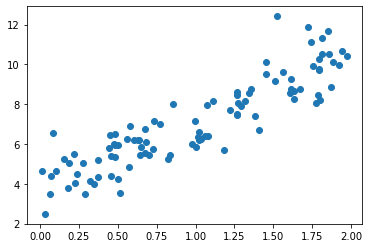

In [4]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [5]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [7]:
#X_fit[]

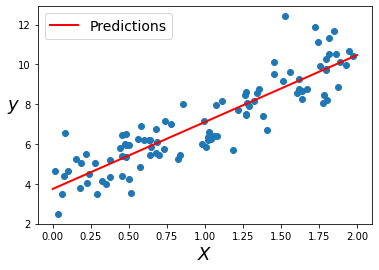

In [8]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [12]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [13]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [14]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

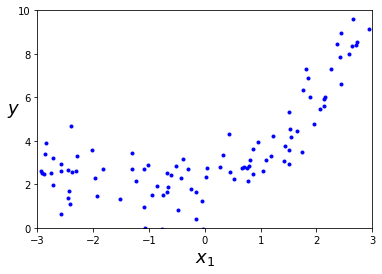

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [16]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [19]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [20]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [21]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

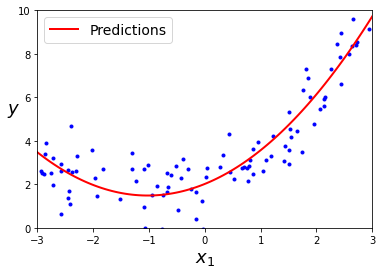

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [23]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [24]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [25]:
len(X)

1000

In [26]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

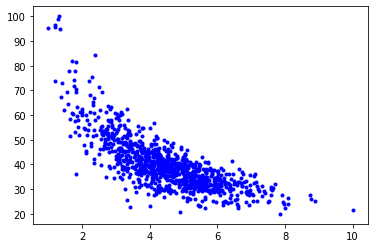

In [27]:
plt.plot(X,y,'b.')

**Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).**

In [28]:
#lineal

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.**

In [29]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

Y_new = linear_reg.predict(X_test)
linear_reg.coef_, lin_reg.intercept_

(array([-6.21850698]), array([2.01873554]))

**Visualización**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


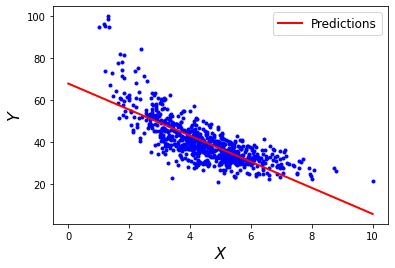

In [30]:
X_fit = np.linspace(0, 10, 200)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.plot(X_train, y_train, "b.")
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=16)
plt.ylabel("$Y$", rotation=90, fontsize=16)
plt.legend(loc="upper right", fontsize=12);

**Cálculo de errores y R squared**

In [31]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, Y_new))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_new)))
print('r2_score: ',r2_score(y_test, Y_new))

Error medio Absoluto (MAE): 4.513943834797746
Root Mean Squared Error: 5.932738736518161
r2_score:  0.5695897011831419


**Regresión Polinomial**

In [32]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)
lin_reg.coef_, lin_reg.intercept_

(array([-34.51814321,   5.05171512,  -0.26070502]), 114.03870684172352)

**Visualización**

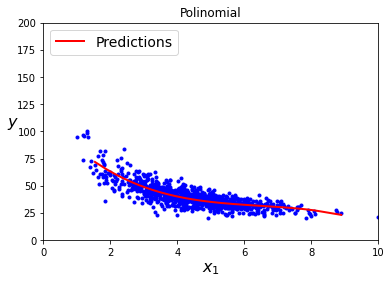

In [33]:
X_poly = poly_features.fit_transform(X_test)
y_predict = lin_reg.predict(X_poly)

ordered = np.argsort(X_test.values.ravel())

x_sorted_poly = X_test.values.ravel()[ordered]
y_sorted_poly = y_test.values.ravel()[ordered]
sorted_predicPoly = y_predict[ordered]


plt.plot(X, y, "b.")
plt.plot(x_sorted_poly, sorted_predicPoly, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.legend(loc="upper left", fontsize=14)
plt.title("Polinomial")
plt.axis([0, 10, 0, 200]);

In [34]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_sorted_poly, sorted_predicPoly))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_sorted_poly, sorted_predicPoly)))
print('r2_score: ',r2_score(y_sorted_poly, sorted_predicPoly))

Error medio Absoluto (MAE): 4.2826319819050385
Root Mean Squared Error: 5.682233156715733
r2_score:  0.6051698511810613


**Realiza la regresión con Ridge y Lasso.**

In [35]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [36]:
modelo_Ridge = Ridge(alpha= 1)
modelo_Ridge.fit(X_train, y_train)
modelo_Ridge.coef_, lin_reg.intercept_

(array([-6.21417711]), 114.03870684172352)

(0.0, 10.0, 0.0, 200.0)

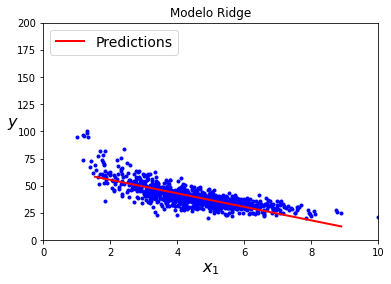

In [37]:
y_predict = modelo_Ridge.predict(X_test)

ordered = np.argsort(X_test.values.ravel())

X_Ridge = X_test.values.ravel()[ordered]
Y_Ridge = y_test.values.ravel()[ordered]
sorted_predictRidge = y_predict[ordered]


plt.plot(X, y, "b.")
plt.plot(X_Ridge, sorted_predictRidge, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.legend(loc="upper left", fontsize=14)
plt.title("Modelo Ridge")
plt.axis([0, 10, 0, 200])

In [38]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(Y_Ridge, sorted_predictRidge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_Ridge, sorted_predictRidge)))
print('r2_score: ',r2_score(Y_Ridge, sorted_predictRidge))

Error medio Absoluto (MAE): 4.5131520437583985
Root Mean Squared Error: 5.931537552576553
r2_score:  0.5697639713218683


In [39]:
modelo_Lasso = Lasso(alpha = 1)
modelo_Lasso.fit(X_train, y_train)
modelo_Lasso.coef_, lin_reg.intercept_

(array([-5.66108868]), 114.03870684172352)

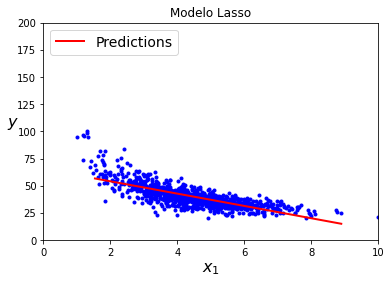

In [40]:
y_predict = modelo_Lasso.predict(X_test)

ordered = np.argsort(X_test.values.ravel())

X_Lasso = X_test.values.ravel()[ordered]
Y_Lasso = y_test.values.ravel()[ordered]
sorted_predictLasso = y_predict[ordered]


plt.plot(X, y, "b.")
plt.plot(X_Lasso, sorted_predictLasso, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.legend(loc="upper left", fontsize=14)
plt.title("Modelo Lasso")
plt.axis([0, 10, 0, 200]);

In [41]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(Y_Lasso, sorted_predictLasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_Lasso, sorted_predictLasso)))
print('r2_score: ',r2_score(Y_Lasso, sorted_predictLasso))

Error medio Absoluto (MAE): 4.450063719199246
Root Mean Squared Error: 5.822404969487834
r2_score:  0.5854498988797452


**MAE (de los cuatro métodos)**

Text(0.5, 1.0, 'Comparación de los modelos con MAE')

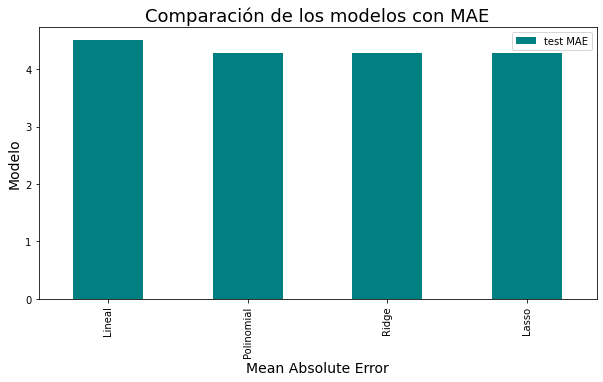

In [42]:
MAE_lineal = metrics.mean_absolute_error(y_test, Y_new)
MAE_Polinomial = metrics.mean_absolute_error(y_sorted_poly, sorted_predicPoly)
MAE_Ridge = metrics.mean_absolute_error(y_sorted_poly, sorted_predicPoly)
MAE_Lasso = metrics.mean_absolute_error(y_sorted_poly, sorted_predicPoly)

comparison_MAE = pd.DataFrame({
                    'modelo': ['Lineal', 'Polinomial', 'Ridge', 'Lasso'],
                    'test MAE': [MAE_lineal, MAE_Polinomial, MAE_Ridge, MAE_Lasso]
                 })

fig, ax = plt.subplots(figsize=(10, 5))
comparison_MAE.set_index('modelo').plot(kind='bar', ax=ax, color = 'teal')
ax.set_xlabel('Mean Absolute Error', fontsize = 14)
ax.set_ylabel('Modelo', fontsize = 14)
ax.set_title('Comparación de los modelos con MAE', fontsize = 18)

**R2 (de los cuatro métodos)**

Text(0.5, 1.0, 'Comparación de los modelos con R2')

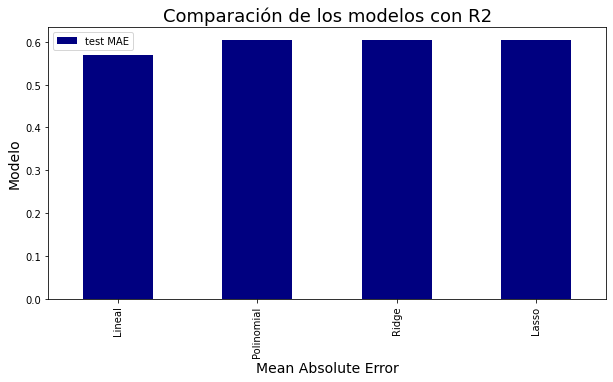

In [43]:
R2_lineal = metrics.r2_score(y_test, Y_new)
R2_Polinomial = metrics.r2_score(y_sorted_poly, sorted_predicPoly)
R2_Ridge = metrics.r2_score(y_sorted_poly, sorted_predicPoly)
R2_Lasso = metrics.r2_score(y_sorted_poly, sorted_predicPoly)

comparison_R2 = pd.DataFrame({
                    'modelo': ['Lineal', 'Polinomial', 'Ridge', 'Lasso'],
                    'test MAE': [R2_lineal, R2_Polinomial, R2_Ridge, R2_Lasso]
                 })

fig, ax = plt.subplots(figsize=(10, 5))
comparison_R2.set_index('modelo').plot(kind='bar', ax=ax, color = 'navy')
ax.set_xlabel('Mean Absolute Error', fontsize = 14)
ax.set_ylabel('Modelo', fontsize = 14)
ax.set_title('Comparación de los modelos con R2', fontsize = 18)

**Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?**

El método que conviene más utilizar es el polynomial, ya que tuvo un mejor desempeño y los errores son menores.

Utilicé 80% de entrenamiento y 20% para la evaluación.

En el caso del MAE, se obtuvo un error del 4.5. Mientras que para el R2, se obtuvo un error del 0.5. Ambos errores fueron buenos, entre más cerca está del 0, mejor son las predicciones.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [46]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [47]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


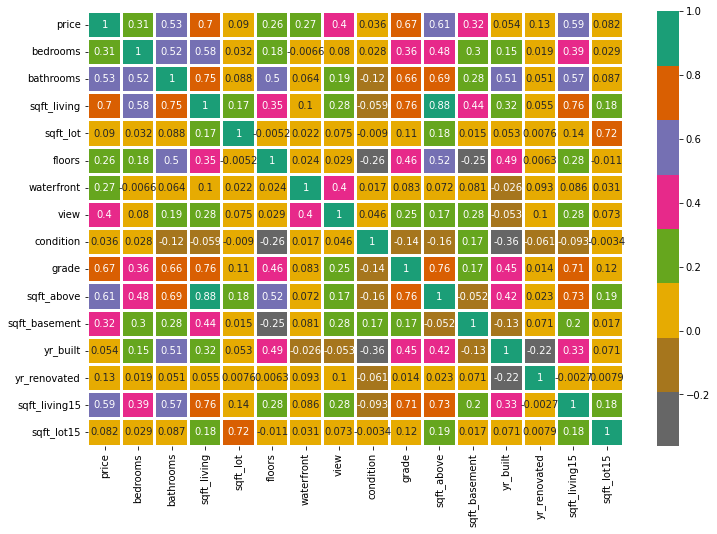

In [48]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [49]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


**Regresión Múltiple Lineal**

In [51]:
#tu codigo aquí

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

Y_pred = linear_reg.predict(X_test)
linear_reg.coef_, lin_reg.intercept_

(array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750271e+01,  6.02175565e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]),
 114.03870684172352)

In [52]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('r2_score: ',r2_score(y_test, Y_pred))

Error medio Absoluto (MAE): 137480.1388273178
Root Mean Squared Error: 232133.3676240749
r2_score:  0.6579723205007814


In [53]:
MAE_lineal = metrics.mean_absolute_error(y_test, Y_pred)
R2_lineal = metrics.r2_score(y_test, Y_pred)
print(MAE_lineal, R2_lineal)

137480.1388273178 0.6579723205007814


**Regresión Múltiple Polinomial**

In [54]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train2 = poly_features.fit_transform(X_train)
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly_train2, y_train)
lin_reg.coef_, lin_reg.intercept_

X_poly_test = poly_features.fit_transform(X_test)
y_pred = lin_reg.predict(X_poly_test)

lin_reg.coef_, lin_reg.intercept_

(array([[ 9.33912834e+05, -1.09330730e+06, -4.56449932e+02,
         -2.78686288e+01, -2.07407238e+06, -3.95431870e+06,
         -2.88638026e+05,  5.58697570e+05,  1.09864510e+06,
         -2.19758415e+02, -3.82034272e+02, -8.59630908e+04,
         -2.95351595e+03,  3.99965710e+03, -3.40106316e+01,
          9.57541696e+02,  7.49958190e+03, -1.37969466e+01,
         -1.84926695e-02,  8.57699569e+03, -1.14965893e+04,
         -3.06588900e+02, -5.24628836e+03, -5.36788065e+03,
         -1.20757669e+00, -1.46068182e+01, -4.67099451e+02,
         -9.13191519e+00,  1.72800642e+01,  2.15500198e-01,
         -9.63429892e+03,  1.53879172e+01, -1.35842369e-01,
         -2.59067293e+04,  4.33707238e+04,  3.82942459e+03,
         -1.07592927e+03,  2.22971689e+04,  1.44292325e+01,
          1.33928361e+00,  5.03401980e+02, -1.70798805e+01,
         -1.72895923e+01, -5.56785248e-02,  1.56185890e+00,
         -4.34972758e+00,  4.83299456e+00,  1.60303193e+02,
         -1.42711737e+01,  1.31138593e+0

In [55]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score: ',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 121314.06948173394
Root Mean Squared Error: 186261.28575138954
r2_score:  0.7797929072570198


In [56]:
MAE_polinomial = metrics.mean_absolute_error(y_test, y_pred)
R2_polinomial = metrics.r2_score(y_test, y_pred)
print(MAE_polinomial, R2_polinomial)

121314.06948173394 0.7797929072570198


**Realiza la regresión con Ridge y Lasso.**

In [57]:
modeloRidge = Ridge(alpha = 1)
modeloRidge.fit(X_train, y_train)
modeloRidge.coef_, lin_reg.intercept_
y_pred2 = modeloRidge.predict(X_test)

modeloRidge.coef_, lin_reg.intercept_

(array([[-3.82192265e+04,  4.14509656e+04,  1.08013951e+02,
          1.69318239e-02,  3.16891574e+04,  5.48258333e+05,
          4.14559235e+04,  2.12264347e+04,  1.19470568e+05,
          4.78066878e+01,  6.02065605e+01, -3.55050129e+03,
          1.33171890e+01,  2.89851987e+01, -5.47998512e-01]]),
 array([80227028.3104757]))

In [58]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score: ',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 121314.06948173394
Root Mean Squared Error: 186261.28575138954
r2_score:  0.7797929072570198


In [59]:
MAE_Ridge_2 = metrics.mean_absolute_error(y_test, y_pred)
R2_Ridge_2 = metrics.r2_score(y_test, y_pred)
print(MAE_Ridge_2, R2_Ridge_2)

121314.06948173394 0.7797929072570198


In [60]:
modeloLasso = Lasso(alpha= 0.01)
modeloLasso.fit(X_train, np.ravel(y_train))

y_pred = modeloLasso.predict(X_test)

modeloLasso.coef_, lin_reg.intercept_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


(array([-3.82007921e+04,  4.14660952e+04,  2.93482224e+02,  1.71356245e-02,
         3.16916458e+04,  5.52689524e+05,  4.12493792e+04,  2.12221167e+04,
         1.19493202e+05, -1.37714566e+02, -1.25272065e+02, -3.55090164e+03,
         1.32602477e+01,  2.90059224e+01, -5.48132637e-01]),
 array([80227028.3104757]))

In [61]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score: ',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 137480.14315454173
Root Mean Squared Error: 232133.37922044084
r2_score:  0.6579722863283719


In [62]:
MAE_Lasso_2 = metrics.mean_absolute_error(y_test, y_pred)
R2_Lasso_2 = metrics.r2_score(y_test, y_pred)
print(MAE_Lasso_2, R2_Lasso_2)

137480.14315454173 0.6579722863283719


In [63]:
modeloLasso = Lasso(alpha= 0.01)
modeloLasso.fit(X_train, np.ravel(y_train))

y_pred = modeloLasso.predict(X_test)

modeloLasso.coef_, lin_reg.intercept_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


(array([-3.82007921e+04,  4.14660952e+04,  2.93482224e+02,  1.71356245e-02,
         3.16916458e+04,  5.52689524e+05,  4.12493792e+04,  2.12221167e+04,
         1.19493202e+05, -1.37714566e+02, -1.25272065e+02, -3.55090164e+03,
         1.32602477e+01,  2.90059224e+01, -5.48132637e-01]),
 array([80227028.3104757]))

In [64]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score: ',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 137480.14315454173
Root Mean Squared Error: 232133.37922044084
r2_score:  0.6579722863283719


In [65]:
MAE_Lasso_2 = metrics.mean_absolute_error(y_test, y_pred)
R2_Lasso_2 = metrics.r2_score(y_test, y_pred)
print(MAE_Lasso_2, R2_Lasso_2)

137480.14315454173 0.6579722863283719


**MAE (de los cuatro métodos)**

Text(0.5, 1.0, 'Comparación de los modelos con MAE')

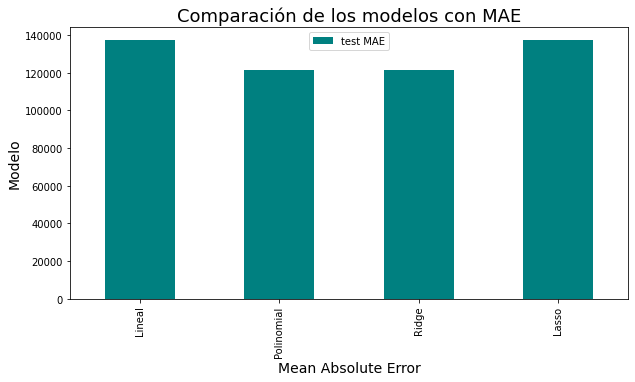

In [66]:
comparison_MAE_2 = pd.DataFrame({
                    'modelo': ['Lineal', 'Polinomial', 'Ridge', 'Lasso'],
                    'test MAE': [MAE_lineal, MAE_polinomial, MAE_Ridge_2, MAE_Lasso_2]
                 })

fig, ax = plt.subplots(figsize=(10, 5))
comparison_MAE_2.set_index('modelo').plot(kind='bar', ax=ax, color = "teal")
ax.set_xlabel('Mean Absolute Error', fontsize = 14)
ax.set_ylabel('Modelo', fontsize = 14)
ax.set_title('Comparación de los modelos con MAE', fontsize = 18)

**R2 (de los cuatro métodos)**

Text(0.5, 1.0, 'Comparación de los modelos con R2')

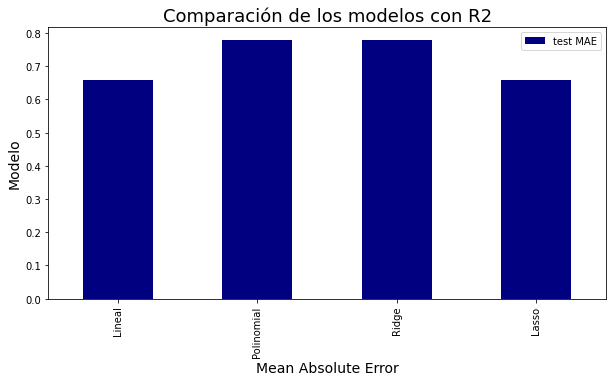

In [67]:
df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Polinomial', 'Ridge', 'Lasso'],
                    'test MAE': [R2_lineal, R2_polinomial, R2_Ridge_2, R2_Lasso_2]
                 })

fig, ax = plt.subplots(figsize=(10, 5))
df_comparacion.set_index('modelo').plot(kind='bar', ax=ax, color = 'Navy')
ax.set_xlabel('Mean Absolute Error', fontsize = 14)
ax.set_ylabel('Modelo', fontsize = 14)
ax.set_title('Comparación de los modelos con R2', fontsize = 18)

**Explica tus resultados, que método se aproxima mejor, ¿por que?, ¿que porcentajes de entrenamiento y evaluación? ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?**

Ambos métodos son iguales, pero el polinomial sigue siendo para mi el que mayor aproximación tiene, debido a que tiene menor error en sus predicciones.

En este caso se ocupó el 90% para entrenamiento y 10% de evaluación.

Ambos modelos tuvieron un buen rendimiento. 

**Conclusiones**

Esta práctica no fue sencilla, pero me ayudó a comprender los modelos lineales y polinomiales, profundizando en su entrenamiento y analizando una comparación entre ambos.

Para ambos ejercicios, el modelo polinomial fue el que mayor aproximación tiene. Es importante realizar una comparación entre los modelos, ya que podemos obtener resultados muy similares, y es necesario elegir el mejor con las métricas utilizadas para medir el desempeño de cada uno.

# Notebook 2: K Means

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [68]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 9.2 MB/s 
     |████████████████████████████████| 1.0 MB 57.5 MB/s 
     |████████████████████████████████| 1.7 MB 54.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 67.1 MB/s 
     |████████████████████████████████| 6.3 MB 52.1 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27813 sha256=3d6836e5d4692b3d7e07559ff5661cfcc3dbdd61bb409892844435fa86cf261a
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=47fd7206913d4f99ded4751ad640f2a95f922ff0f315b0d9d1ea08fea4dc85c8
  Stored in directory: /root/.

In [69]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [70]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [71]:
df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [73]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

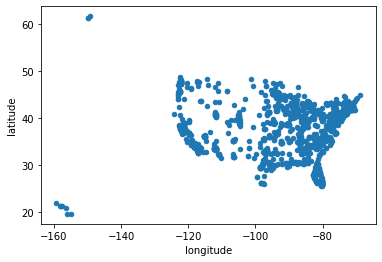

In [74]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [75]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.

In [76]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [77]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [78]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [79]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [80]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

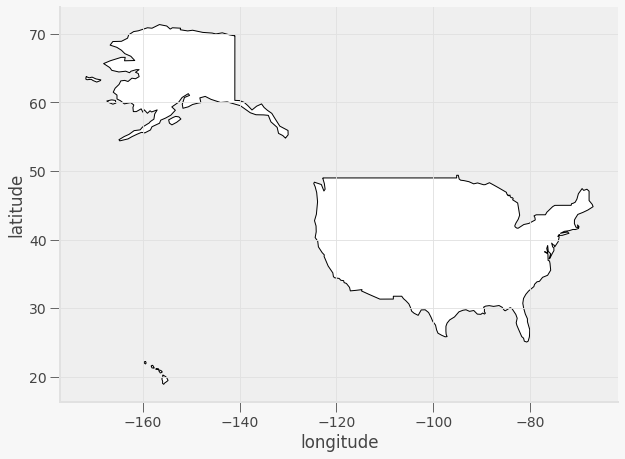

In [81]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

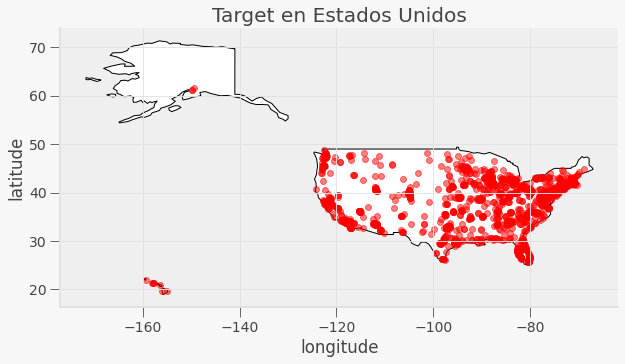

In [82]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [83]:
#tu codigo aquí